## Exercise 1 - Simple Gaussian Distribution

Left **KDE** to show how close visually does n(1000 in this case) samples look in comparison to **uniform distribution**.

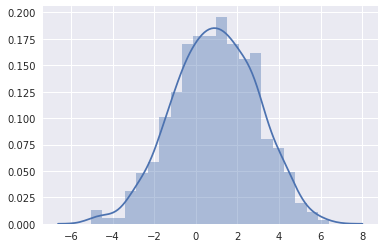

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
sns.distplot(np.random.normal(1, 2, 1000))


## Exercise 2 - Gambler's game

Implementation of gambler's game with many possible parameters. Returns number of wins for each of two players
and their capital in each round.

Player wins: 119
Opponent wins: 139


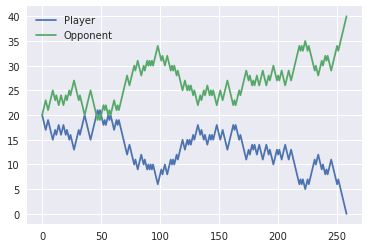

In [2]:
#Neccessary imports already in previous cells

def gamblers_ruin(win_probability=0.5, 
                  player_capital=20, opponent_capital=20, 
                  maximum_player_capital=40, minimum_player_capital=0, 
                  maximum_opponent_capital=40, minimum_opponent_capital=0, 
                  difference=1, maximum_iterations=100000):
    '''Returns array with amount of money for each player for the whole game'''
    player_rounds, opponent_rounds = [player_capital], [opponent_capital]
    player_wins, opponent_wins = 0,0
    i=0
    while (minimum_player_capital < player_capital < maximum_player_capital) \
        and (minimum_opponent_capital < opponent_capital < maximum_opponent_capital) \
        and i<maximum_iterations:
        if np.random.random() < win_probability:
            player_capital+=difference
            player_wins+=1
            player_rounds.append(player_capital)
            opponent_capital-=difference
            opponent_rounds.append(opponent_capital)
        else:
            player_capital-=difference
            player_rounds.append(player_capital)
            opponent_capital+=difference
            opponent_wins+=1
            opponent_rounds.append(opponent_capital)
        i+=1
    return {'player_wins': player_wins, 'opponent_wins': opponent_wins, 
            'player_rounds': player_rounds, 'opponent_rounds': opponent_rounds, 
            'player_capital': player_capital, 'opponent_capital':opponent_capital}

results = gamblers_ruin()
print("Player wins: {}".format(results['player_wins']))
print("Opponent wins: {}".format(results['opponent_wins']))
plt.plot(results['player_rounds'], label='Player')
plt.plot(results['opponent_rounds'], label='Opponent')
plt.legend()

## Exercise 3 - How likely is the player's ruin in relation to starting capital

Above function used multiple times (update this function's description)

In [ ]:
def player_ruin(win_probability=0.5, maximum_capital=100, tests=100):
    wins_per_capital = []
    for capital in range(maximum_capital):
        wins_per_capital.append(sum([
         gamblers_ruin(
             win_probability, 
             player_capital=capital, opponent_capital=maximum_capital-capital, 
             maximum_opponent_capital=maximum_capital, maximum_player_capital=maximum_capital)['player_capital']==0
         for _ in range(0,tests)
        ])/tests)
    return wins_per_capital

def analytical_values(probability=0.5, maximum_capital=100):
    return [(((1-probability)/probability)**capital-((1-probability)/probability)**maximum_capital)/(100-((100-probability)/probability))**maximum_capital
            for capital in range(maximum_capital)
           ]

plt.plot(player_ruin(win_probability=0.4), 'bo')
plt.plot(analytical_values(probability=0.4))
plt.xlabel('Capital')
plt.ylabel('Probability of losing')
plt.title('How likely is the player\'s ruin based on starting capital')

In [ ]:
plt.plot(analytical_values(probability=0.4))
plt.xlabel('Capital')
plt.ylabel('Probability of losing')
plt.title('How likely is the player\'s ruin based on starting capital')

## Exercise 4 

How many plays are needed to finish each game for different probability values?

Mean of turns required for the game to finish with 0.2 probability of winning: 83.502


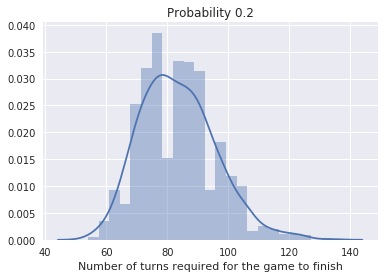

Mean of turns required for the game to finish with 0.5 probability of winning: 2381.642


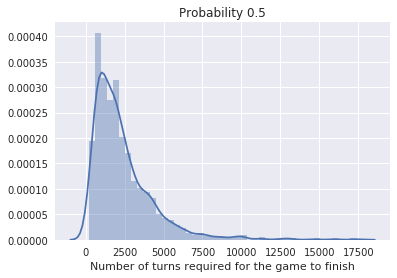

Mean of turns required for the game to finish with 0.8 probability of winning: 82.724


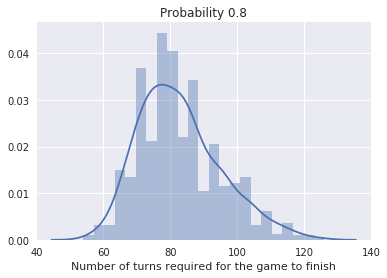

In [4]:
import pandas as pd

def plays_to_end_game(*win_probabilities, **gamblers_ruin_parameters):
    tests = gamblers_ruin_parameters.get('tests', 100)
    maximum_capital = gamblers_ruin_parameters.get('maximum_capital', 100)
    capital = gamblers_ruin_parameters.get('capital', 50)
    probability_results = []
    for win_probability in win_probabilities:
        probability_results.append([])
        for test in range(tests):
            game_results = gamblers_ruin(win_probability, 
                                         player_capital=capital, opponent_capital=maximum_capital-capital, 
                                         maximum_player_capital=maximum_capital, maximum_opponent_capital=maximum_capital)
            probability_results[-1].append(game_results["player_wins"]+game_results["opponent_wins"])
    return probability_results

def display_info(name, data):
    print('Mean of turns required for the game to finish with {} probability of winning: {}'.format(name, np.mean(data)))
    sns.distplot(data)
    plt.title('Probability {}'.format(name))
    plt.xlabel('Number of turns required for the game to finish')
    plt.show()

plays_results = plays_to_end_game(0.2, 0.5, 0.8,tests=1000)
display_info('0.2', plays_results[0])
display_info('0.5', plays_results[1])
display_info('0.8', plays_results[2])

## Exercise 5

Distribution of means of each play depending on the probability of winning

Text(0.5,0,'Average number of games')

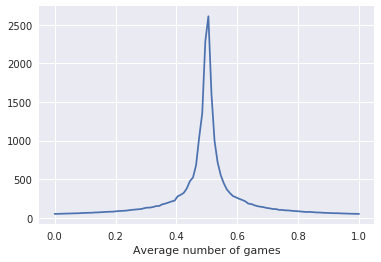

In [5]:
test_range = np.linspace(0,1,num=100)
y = [np.mean(test) for test in plays_to_end_game(*test_range, tests=100)]

plt.plot(test_range, y)
plt.xlabel('Average number of games')

Distribution seen above goes towards Gaussian distribution accordingly to Central Limit Theorem. Outliers represent probability values close 0.5 (average number of turns needed to finish the game hits even 2500) and should be seen as maximum values for this function. Values ranging up to 200 are biased probabilities (0.7 or 0.3 etc.). (na x prawdopodobieństwo, na y wartość gier)

## Exercise 6



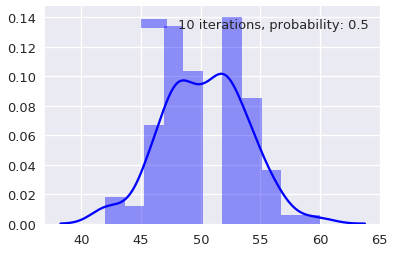

In [19]:
def gamblers_gain(*, iterations, plays=100, win_probability=0.5, player_capital=50, maximum_capital=100):
    data = [gamblers_ruin(win_probability, 
                         player_capital, maximum_capital-player_capital, 
                         maximum_capital, 0, maximum_capital, 0, difference=1,
                         maximum_iterations=iterations)['player_capital'] for _ in range(plays)]
    return data
        

mean_for_half=2482
x = [10, int(0.5*mean_for_half), int(0.9*mean_for_half)]
y = [gamblers_gain(iterations=it, win_probability=0.5) for it in x]

sns.distplot(y[0], color='b', label=str(x[0]) + ' iterations, probability: {}'.format(0.5))
plt.legend()


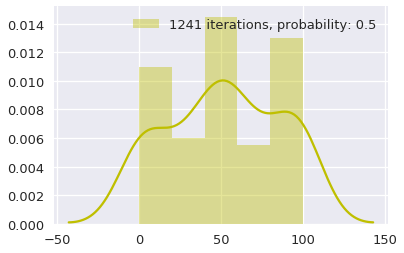

In [20]:
sns.distplot(y[1], color='y', label=str(x[1]) + ' iterations, probability: {}'.format(0.5))
plt.legend()

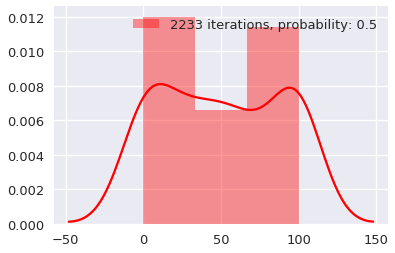

In [21]:
sns.distplot(y[2], color='r', label=str(x[2]) + ' iterations, probability: {}'.format(0.5))
plt.legend()

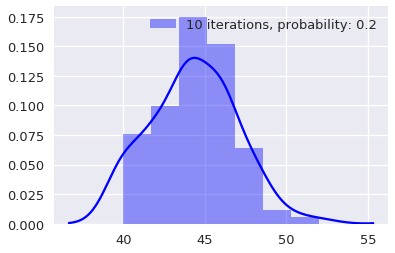

In [22]:
mean_for_one_fifth=82
x = [10, int(0.5*mean_for_one_fifth), int(0.9*mean_for_one_fifth)]
y = [gamblers_gain(iterations=it, win_probability=0.2) for it in x]
sns.distplot(y[0], color='b', label=str(x[0]) + ' iterations, probability: {}'.format(0.2))
plt.legend()

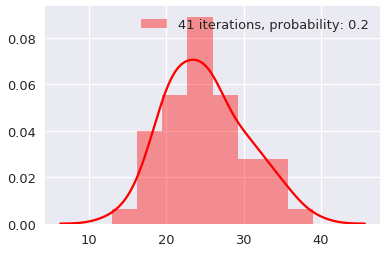

In [24]:
sns.distplot(y[1], color='r', label=str(x[1]) + ' iterations, probability: {}'.format(0.2))
plt.legend()

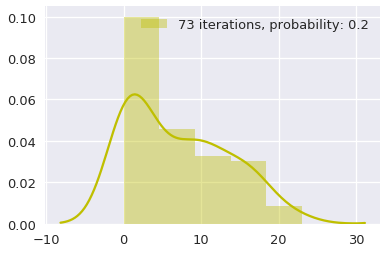

In [25]:
sns.distplot(y[2], color='y', label=str(x[2]) + ' iterations, probability: {}'.format(0.2))
plt.legend()

## Exercise 7

Probability of player's ruin based in function of single play. Different starting capitals


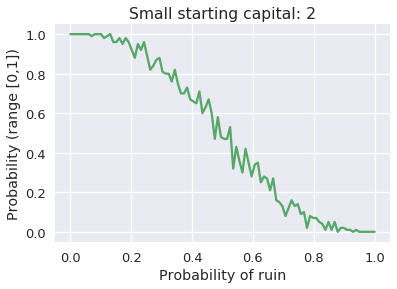

In [46]:
def player_ruin_single_game(capital, probability, tests=100):
    return np.mean([gamblers_ruin(probability, capital, capital, 1000, 0, 1000, 0)['player_capital']==0 for _ in range(tests)])

def player_ruin_probability_range(capital):
    probability_range = np.linspace(0,1,num=100)
    return [player_ruin_single_game(capital, probability) for probability in probability_range], probability_range

small_capital = 2
data_small = player_ruin_probability_range(small_capital)
plt.plot(data_small[1], data_small[0], "C1")
plt.xlabel('Probability of ruin')
plt.ylabel('Probability (range [0,1])')
plt.title('Small starting capital: {}'.format(small_capital))
plt.legend()

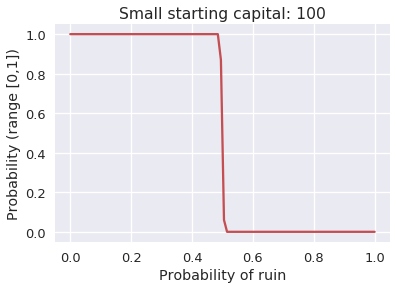

In [47]:
big_capital = 100
data_big = player_ruin_probability_range(big_capital)
plt.plot(data_big[1], data_big[0], "C2")
plt.xlabel('Probability of ruin')
plt.ylabel('Probability (range [0,1])')
plt.title('Small starting capital: {}'.format(big_capital))
plt.legend()